## Business problems
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business objectives
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Data preparation and cleansing
### Import neccessary packages

Although in Python we can import packages anywhere we want, as long as it's prior the use, it'd be better to keep all of neccessary packages in one place. It's easer for reference.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# neccessary packages for data analysis
import numpy as np
import pandas as pd

# packages for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# packages for data partition and normalisation.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# package for linear regression
import statsmodels.api as sm

# package for detecting variance inflation factor. It's useful to detect overfiting.
from statsmodels.stats.outliers_influence import variance_inflation_factor

#package to calculate r2 score and mean squared error
from sklearn.metrics import r2_score, mean_squared_error

#packages to implement Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Exploratory Data Analysis
#### Import dataset from current working folder 

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Handling nulls value

Doing a quick check to see if there is any columns containing all null values.

In [5]:
(data.isnull().sum() == len(data)).sum()

0

It's great, there is no null columns. Now, let's take a closer look on each columns.

In [6]:
null = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
# null.head()

null[null["Null %"] > 0]

,Null %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


Top 5 null columns are categorical variables, and there are more than 50% null data in those columns. They are removed since it's non-sense to impute or handling those columns

In [7]:
data = data.drop(['PoolQC','MiscFeature','Id','Alley','Fence','FireplaceQu'],axis=1)

In [8]:
null = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55
GarageCond,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtQual,2.53


For categorical variables, missing values should be replaced by mode, while missing continuous variables should be replaced by median.

In [9]:
# for the LotFrontage column and GarageYrBlt we will impute the missing values with the median since the feature contains outliers
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())

data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())

# for the "below columns" we will impute the null values with 'mode'
for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual'):
    
    data[col] = data[col].fillna(data[col].mode()[0])
    
# for the "Bsmt" columns we will impute the null values with 'mode'
for col in ('BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual'):
    
    data[col] = data[col].fillna(data[col].mode()[0])
    
# for the columns we will impute the null values with 'mode'

for col in ('MasVnrArea', 'MasVnrType', 'Electrical'):
    
    data[col] = data[col].fillna(data[col].mode()[0])


Quick check to ensure all missing values are handled properly.

In [10]:
null = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,


#### Handling outliers
Extreme values, which are above 95% or below 5%, are considered outliers and should be removed before hand.

In [11]:
# Numeric columns
numeric_columns = data.select_dtypes(exclude='object').columns

p05 = data[numeric_columns].quantile(0.05)
p95 = data[numeric_columns].quantile(0.95)

## calculating the range from p05 to p95
p05_95 = p95 - p05

## all data beyond that range are removed. 
## new dataset data_v2 is created to reserve data_v1
data = data[~((data[numeric_columns] < (p05 - 1.5 * p05_95)) |(data[numeric_columns] > (p95 + 1.5 * p05_95))).any(axis=1)]

## Identifying significant features
### Categorical variables
Since there are many categorical variables, it's essential to identify which variables may have impact to the dependent variables. The best way is using box plot, each box is one category. If we can see the median price varies (usually out of other boxes) for each value in a category, we may consider using that categorical variable.

#### MSSubClass - will be used

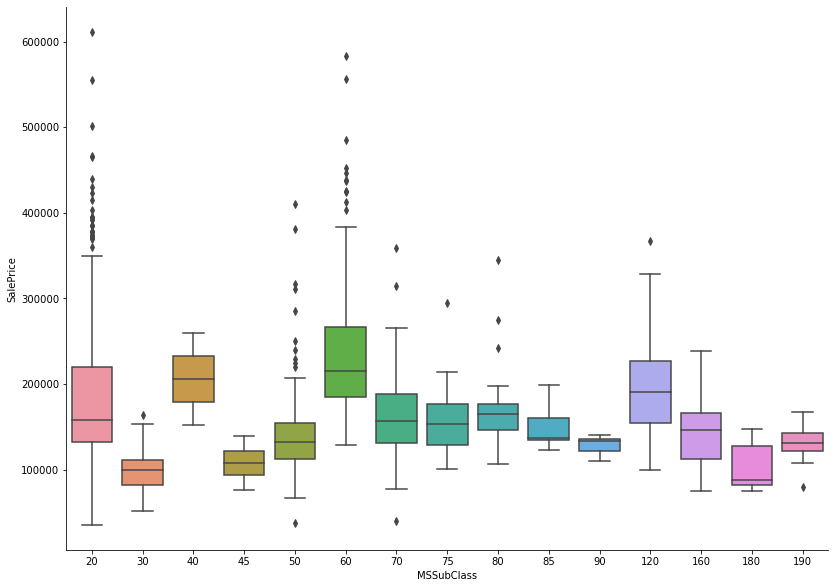

In [12]:
sns.catplot(x="MSSubClass"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [13]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="MSSubClass"
         , aggfunc='count' 
        )

,SalePrice
MSSubClass,
20,490
30,62
40,2
45,12
50,123
60,273
70,55
75,8
80,52


We can see that some MSSubClass values have median sales price vary quite significant compared to others. That's variable may be helpful in a linear model.

#### MSZoning - will be used

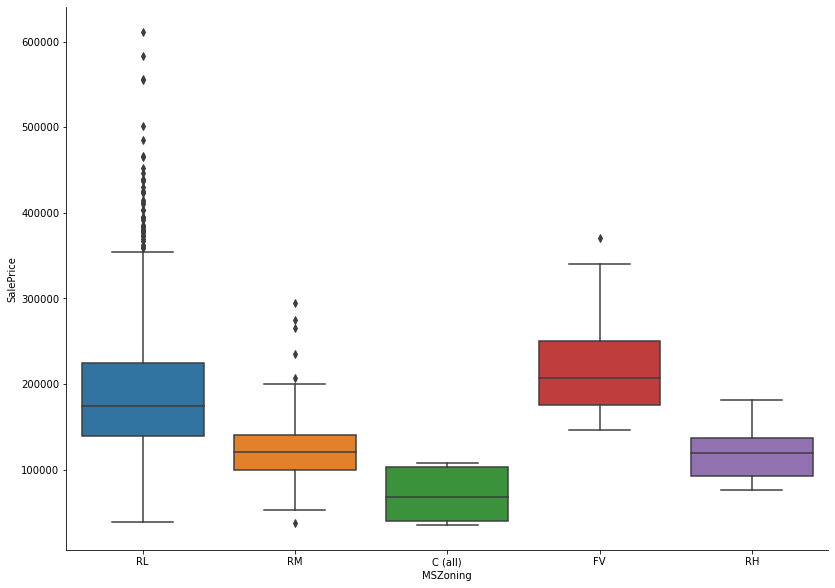

In [14]:
sns.catplot(x="MSZoning"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [15]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="MSZoning"
         , aggfunc='count' 
        )

,SalePrice
MSZoning,
C (all),5
FV,61
RH,11
RL,1005
RM,184


Similarity, the sale price varies for each values in this variable. This variable will be considered later.

#### Street - not in used

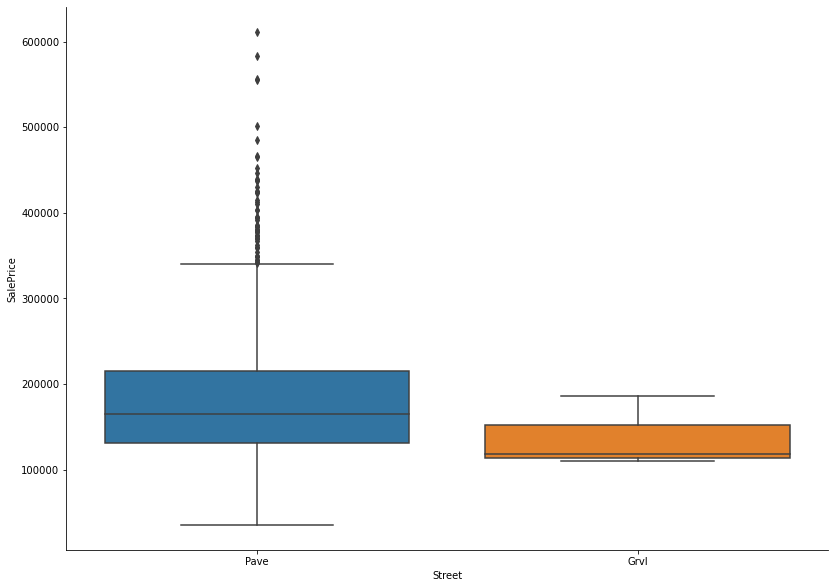

In [16]:
sns.catplot(x="Street"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [17]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="Street"
         , aggfunc='count' 
        )

,SalePrice
Street,
Grvl,3
Pave,1263


#### LotShape - not in used

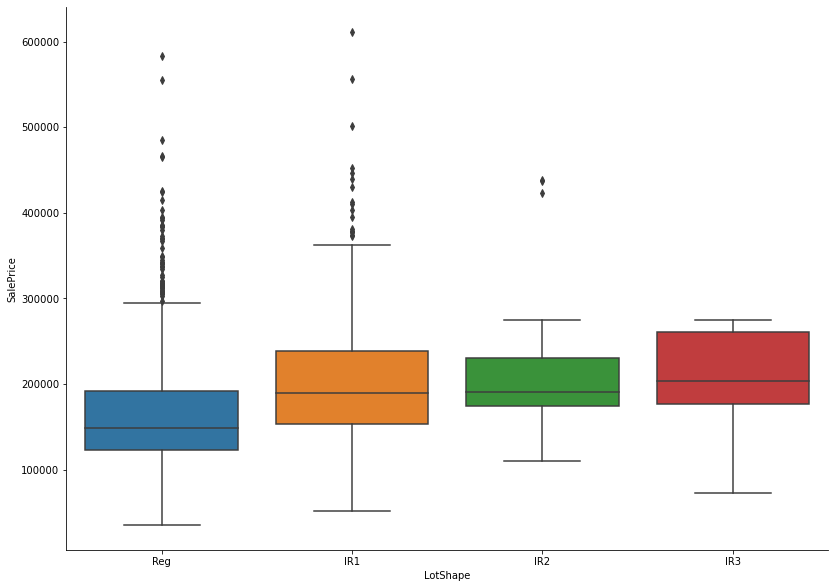

In [18]:
sns.catplot(x="LotShape"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [19]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="LotShape"
         , aggfunc='count' 
        )

,SalePrice
LotShape,
IR1,424
IR2,30
IR3,8
Reg,804


It's a bit strange that a regular shape house is less expensive than other shapes, although the difference is not very significant. So, this variable may not be a good indicator for the model. It's safe to exclude.

#### LandContour - not in used

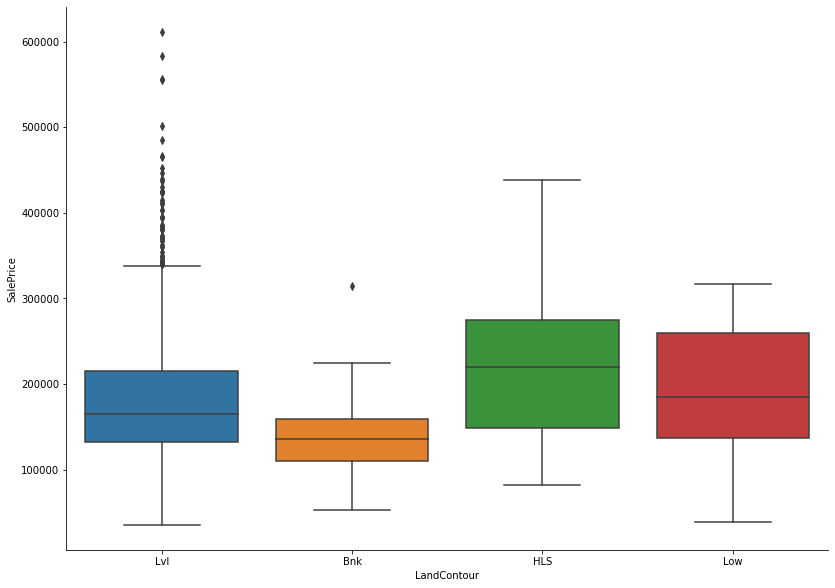

In [20]:
sns.catplot(x="LandContour"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [21]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="LandContour"
         , aggfunc='count' 
        )

,SalePrice
LandContour,
Bnk,47
HLS,41
Low,23
Lvl,1155


Similar to shape of property, this variable may not contribute much the model since the sale price does not vary much.

#### Utilities - not in used

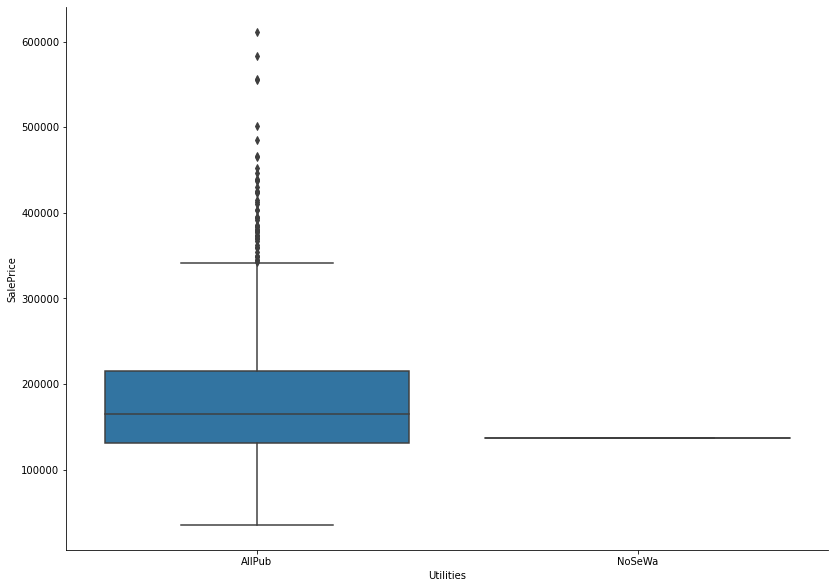

In [22]:
sns.catplot(x="Utilities"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [23]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="Utilities"
         , aggfunc='count' 
        )

,SalePrice
Utilities,
AllPub,1265
NoSeWa,1


Because only 1 out of 1460 observation has NoSeWa, the data is extremely biased, this variable is excluded.

#### LotConfig - not in used

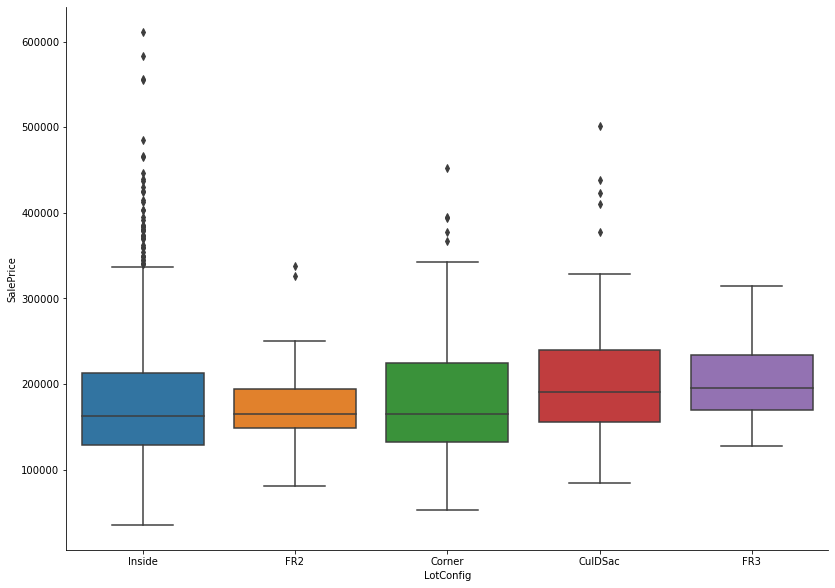

In [24]:
sns.catplot(x="LotConfig"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [25]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="LotConfig"
         , aggfunc='count' 
        )

,SalePrice
LotConfig,
Corner,221
CulDSac,77
FR2,41
FR3,4
Inside,923


The sale prices are almost stable among all the lot configuration, except FR3 and CulDSac, they are a slightly higher compared to others. This variable is not in used.

#### LandSlope - not in used

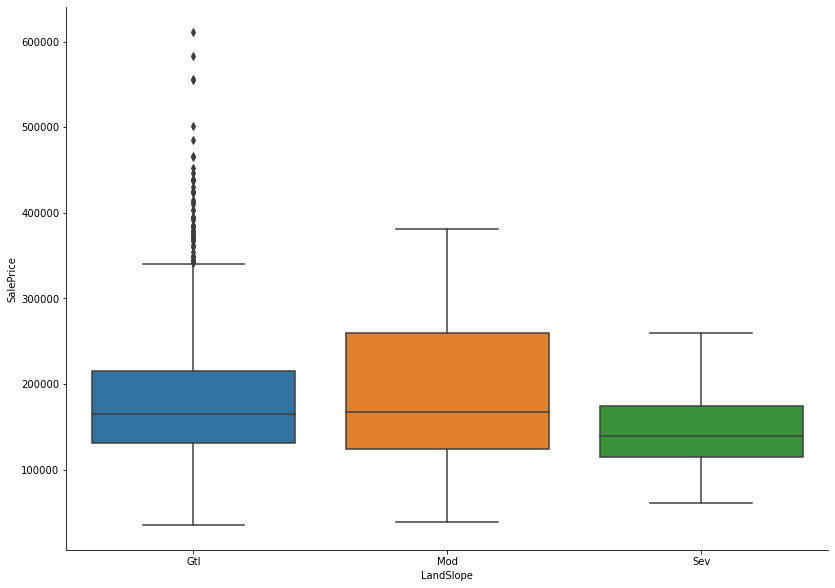

In [26]:
sns.catplot(x="LandSlope"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [27]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="LandSlope"
         , aggfunc='count' 
        )

,SalePrice
LandSlope,
Gtl,1207
Mod,53
Sev,6


Similarity, this varible is not a good indicator as the sale prices are almost the same.

#### Neighborhood - will be used.

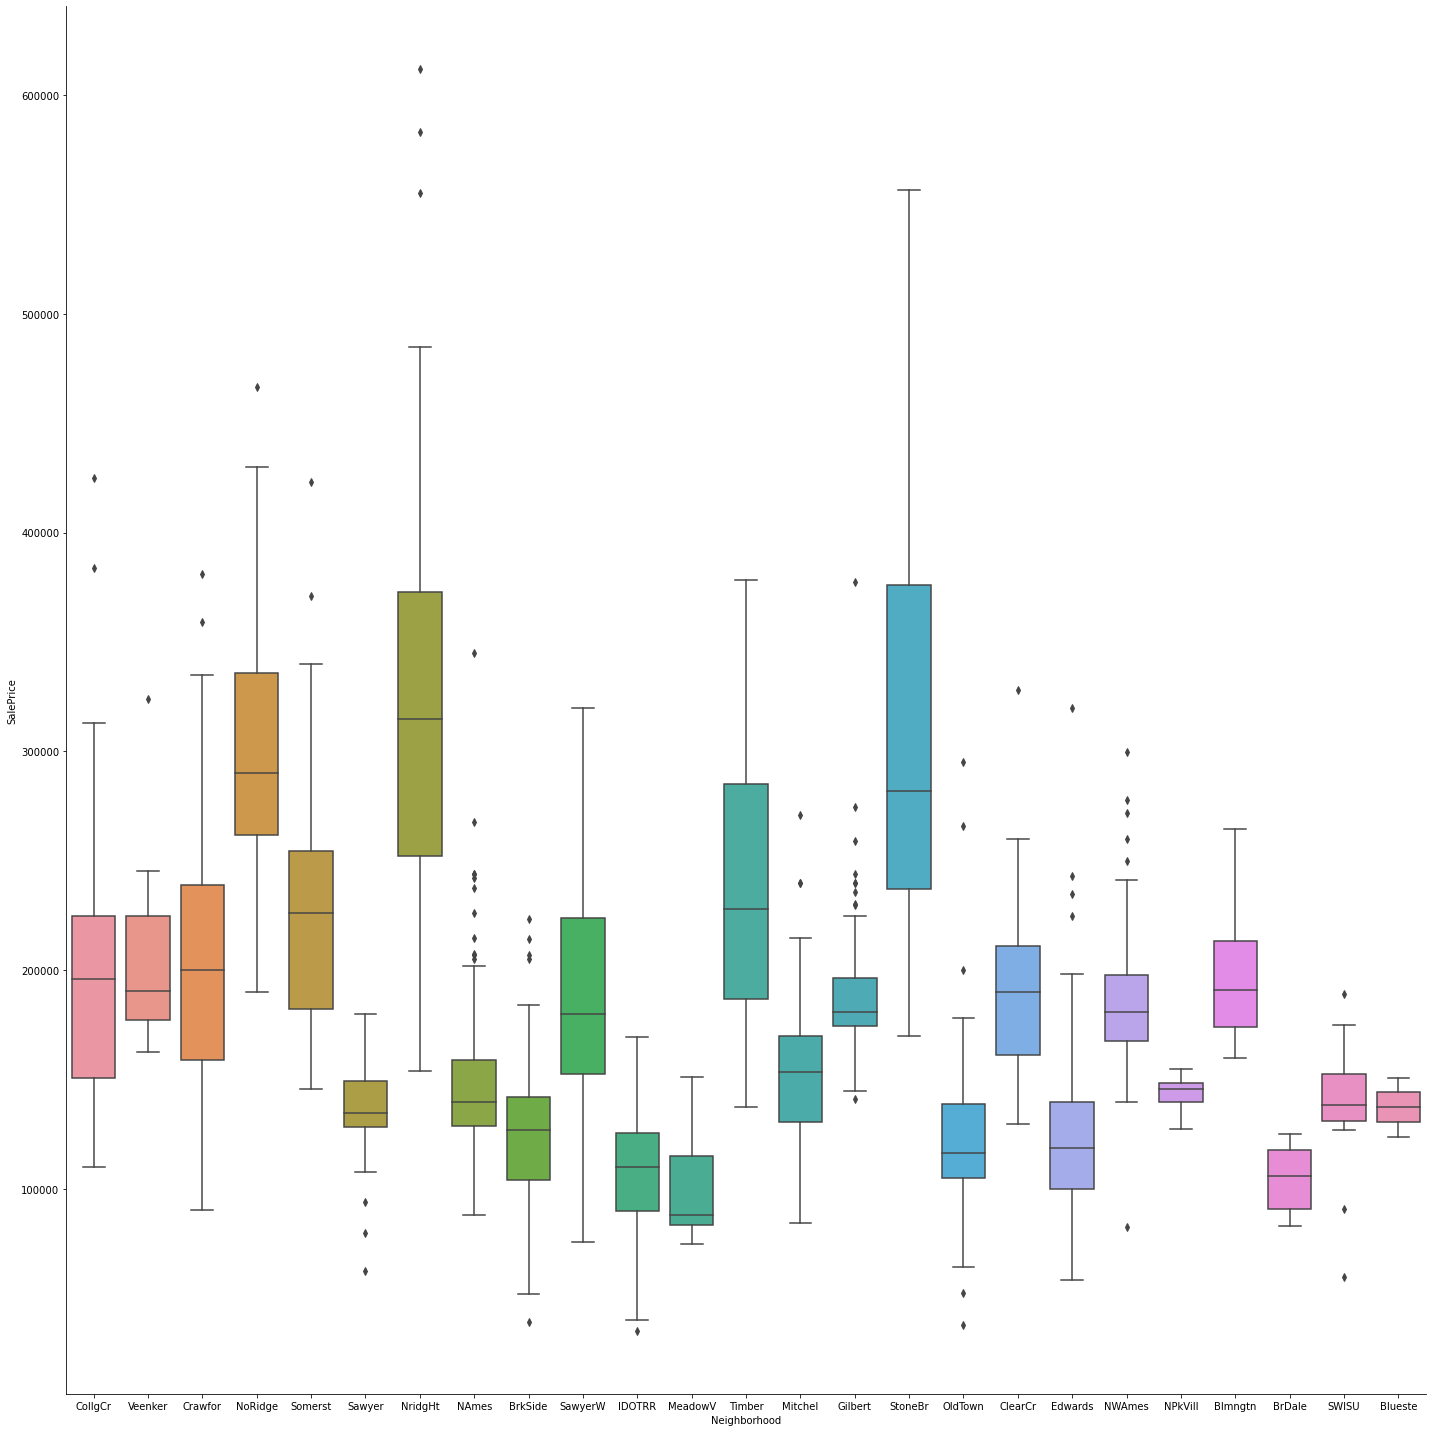

In [28]:
sns.catplot(x="Neighborhood"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=20
           )

In [29]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="Neighborhood"
         , aggfunc='count' 
        )

,SalePrice
Neighborhood,
Blmngtn,17
Blueste,2
BrDale,16
BrkSide,52
ClearCr,17
CollgCr,146
Crawfor,43
Edwards,85
Gilbert,71


Although this variable has a lot values, we can clearly see the sale prices are vary significant from each other. This variable is save for futher investigate. Perhaps, after creating dummy varibles for this variable, it's good example for Lasso technique to select feature.

#### Condition1 - not in used.

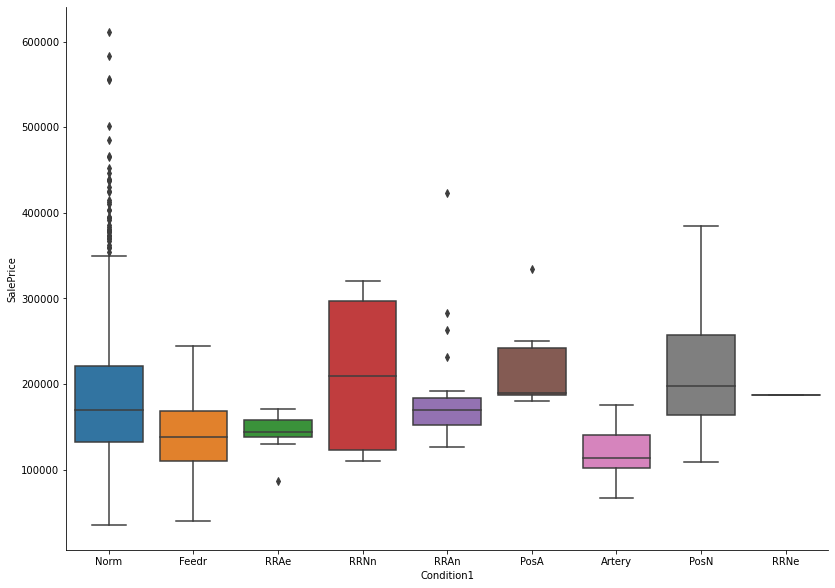

In [30]:
sns.catplot(x="Condition1"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [31]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="Condition1"
         , aggfunc='count' 
        )

,SalePrice
Condition1,
Artery,36
Feedr,58
Norm,1114
PosA,7
PosN,15
RRAe,9
RRAn,22
RRNe,1
RRNn,4


If all the above boxes are arranged in sale pricess ascending order, it's clearer to see a linear correlation between condition and sale prices. However, it's a bit pity that 86% of all property are normal condition, this variable is not in used.

#### Condition2 - not in used

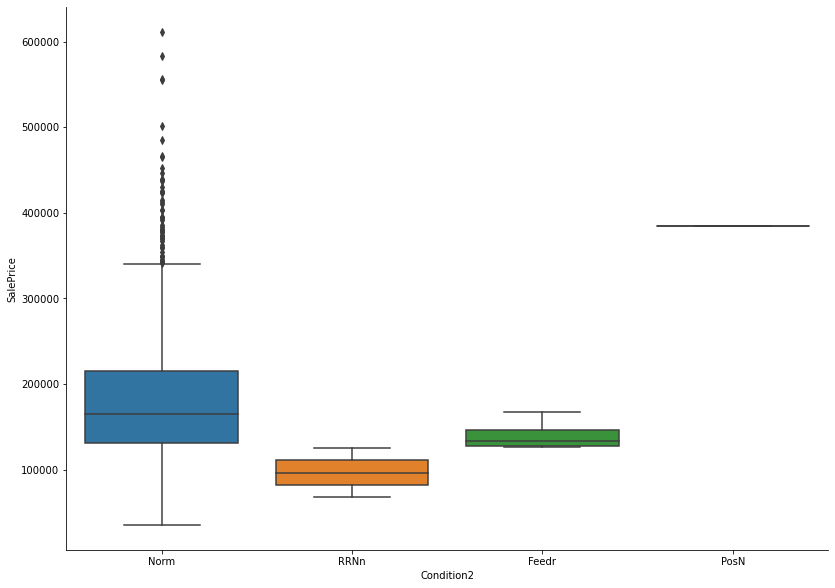

In [32]:
sns.catplot(x="Condition2"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [33]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="Condition2"
         , aggfunc='count' 
        )

,SalePrice
Condition2,
Feedr,4
Norm,1259
PosN,1
RRNn,2


Similar to Utilties variable, this variable has a lot of extrem data, it's safe to remove this variable.

#### BldgType - not in used


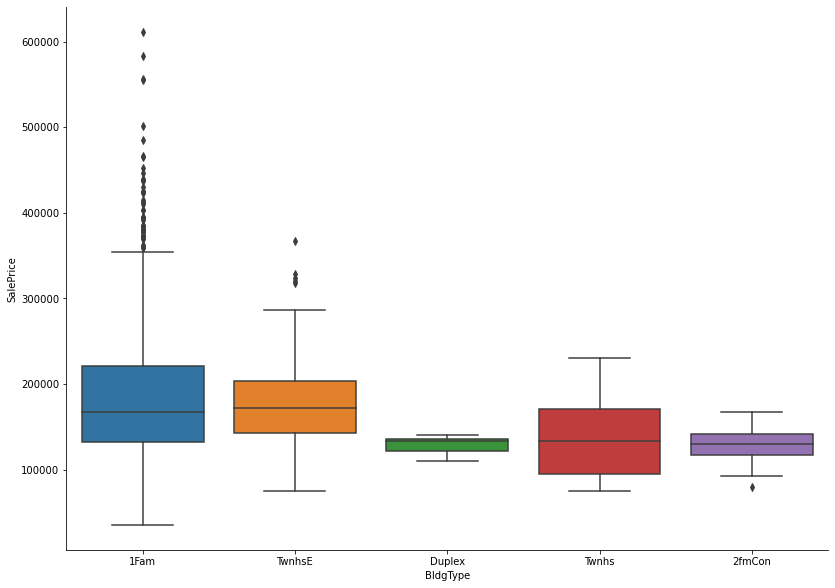

In [34]:
sns.catplot(x="BldgType"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [35]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="BldgType"
         , aggfunc='count' 
        )

,SalePrice
BldgType,
1Fam,1098
2fmCon,12
Duplex,6
Twnhs,42
TwnhsE,108


#### HouseStyle - will be used

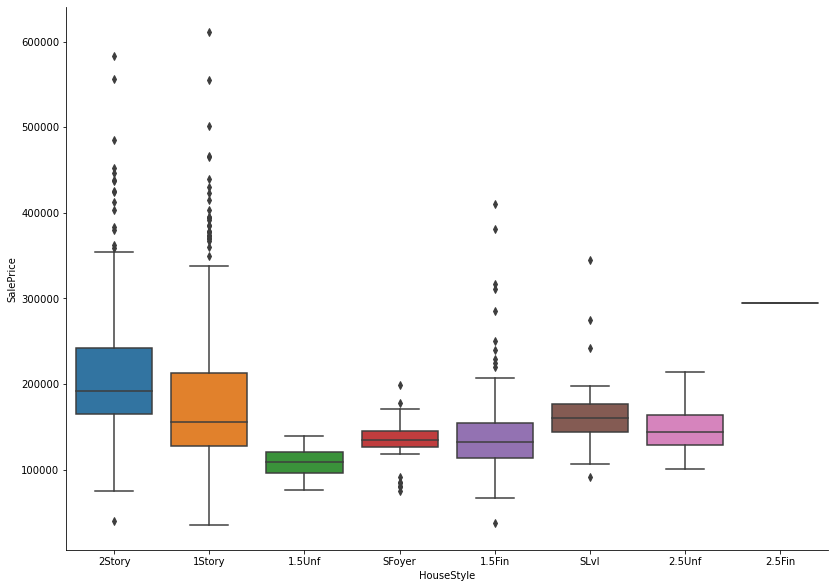

In [36]:
sns.catplot(x="HouseStyle"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [37]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="HouseStyle"
         , aggfunc='count' 
        )

,SalePrice
HouseStyle,
1.5Fin,123
1.5Unf,13
1Story,640
2.5Fin,1
2.5Unf,7
2Story,392
SFoyer,31
SLvl,59


#### RoofStyle - not in used

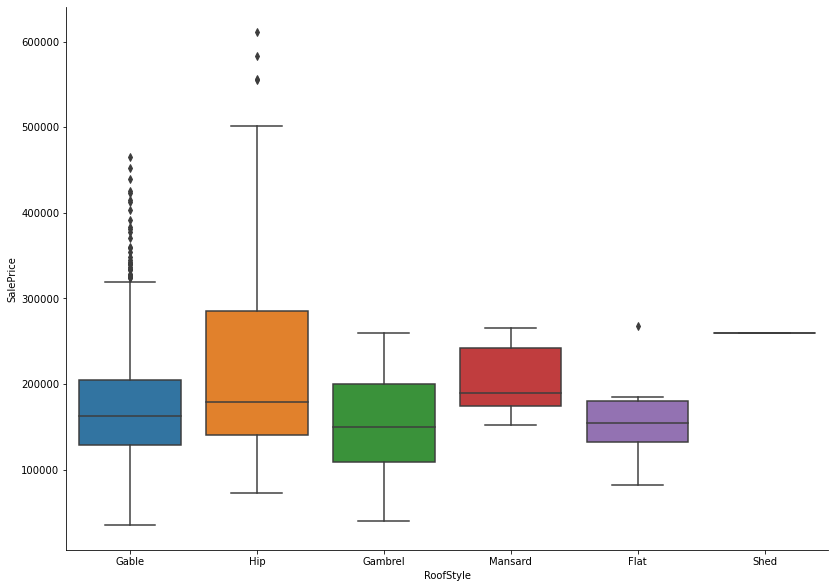

In [38]:
sns.catplot(x="RoofStyle"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [39]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="RoofStyle"
         , aggfunc='count' 
        )

,SalePrice
RoofStyle,
Flat,6
Gable,998
Gambrel,10
Hip,246
Mansard,5
Shed,1


#### RoofMatl - not in used

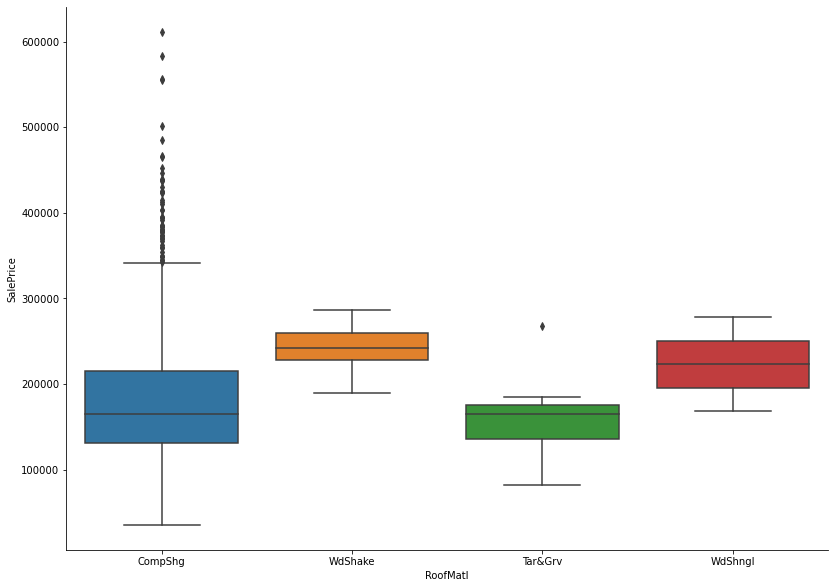

In [40]:
sns.catplot(x="RoofMatl"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [41]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="RoofMatl"
         , aggfunc='count' 
        )

,SalePrice
RoofMatl,
CompShg,1252
Tar&Grv,7
WdShake,5
WdShngl,2


#### Exterior1st - will be used

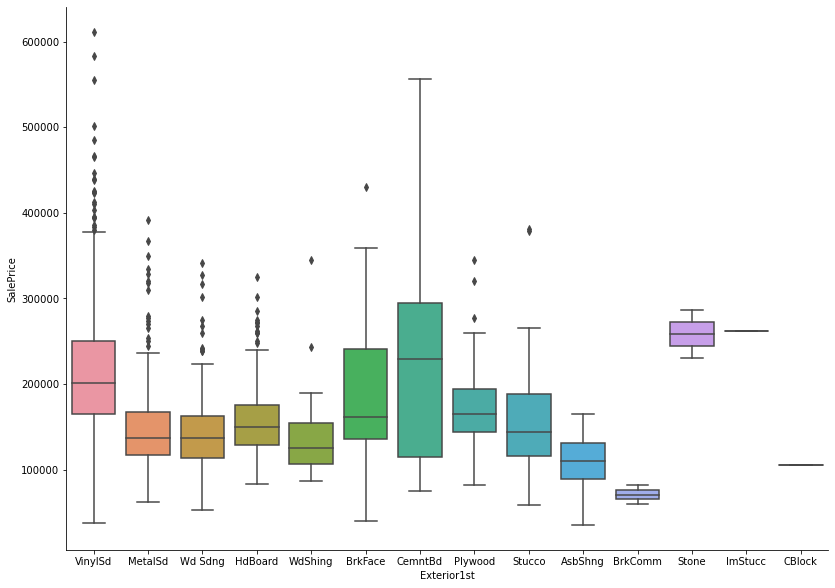

In [42]:
sns.catplot(x="Exterior1st"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [43]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="Exterior1st"
         , aggfunc='count' 
        )

,SalePrice
Exterior1st,
AsbShng,15
BrkComm,2
BrkFace,39
CBlock,1
CemntBd,57
HdBoard,191
ImStucc,1
MetalSd,186
Plywood,79


#### Exterior2nd - not in used

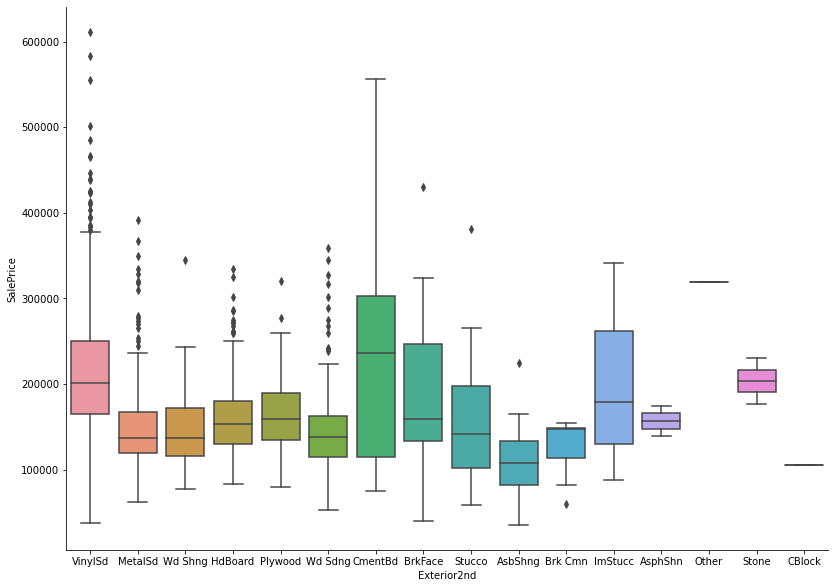

In [44]:
sns.catplot(x="Exterior2nd"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [45]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="Exterior2nd"
         , aggfunc='count' 
        )

,SalePrice
Exterior2nd,
AsbShng,16
AsphShn,2
Brk Cmn,7
BrkFace,20
CBlock,1
CmentBd,57
HdBoard,177
ImStucc,9
MetalSd,181


There may be a duplication if two variables Exterior1st and Exterior2nd are used together. Therefore, only the first variable Exterior1st will be used and the Exterior2nd will be excluded. 

#### MasVnrType - will be used

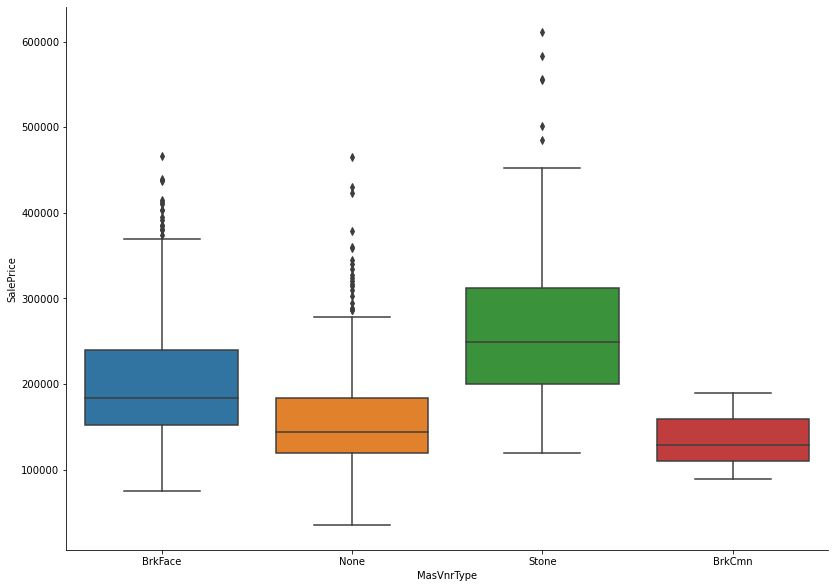

In [46]:
sns.catplot(x="MasVnrType"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [47]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="MasVnrType"
         , aggfunc='count' 
        )

,SalePrice
MasVnrType,
BrkCmn,13
BrkFace,397
None,736
Stone,120


#### ExterQual - will be used

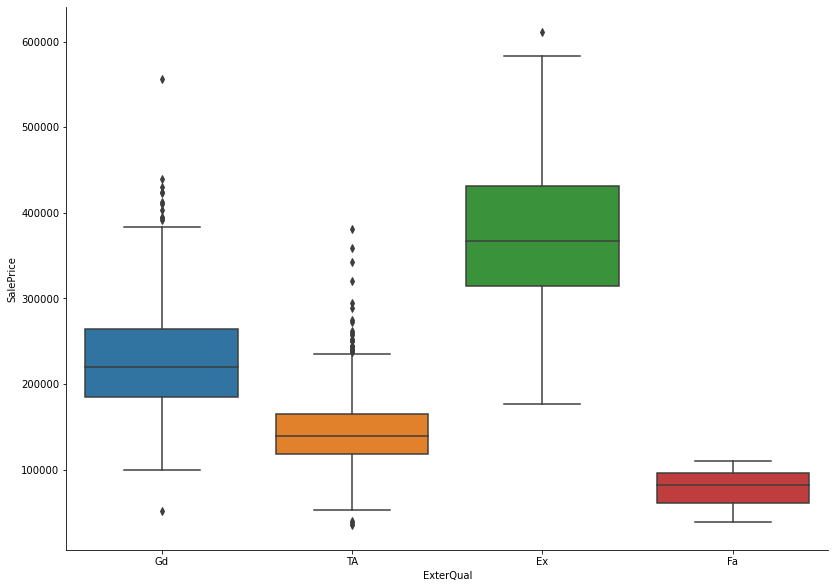

In [48]:
sns.catplot(x="ExterQual"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [49]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="ExterQual"
         , aggfunc='count' 
        )

,SalePrice
ExterQual,
Ex,43
Fa,8
Gd,450
TA,765


#### ExterCond - not in used

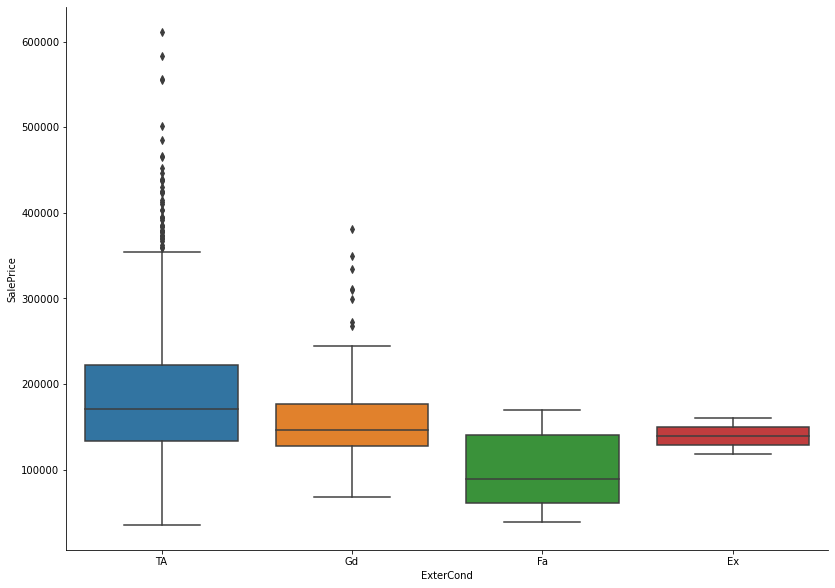

In [50]:
sns.catplot(x="ExterCond"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [51]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="ExterCond"
         , aggfunc='count' 
        )

,SalePrice
ExterCond,
Ex,2
Fa,21
Gd,126
TA,1117


In business sense, this varible may be duplicated with variable ExterQual, so it will be excluded from the model.

#### Foundation - will be used

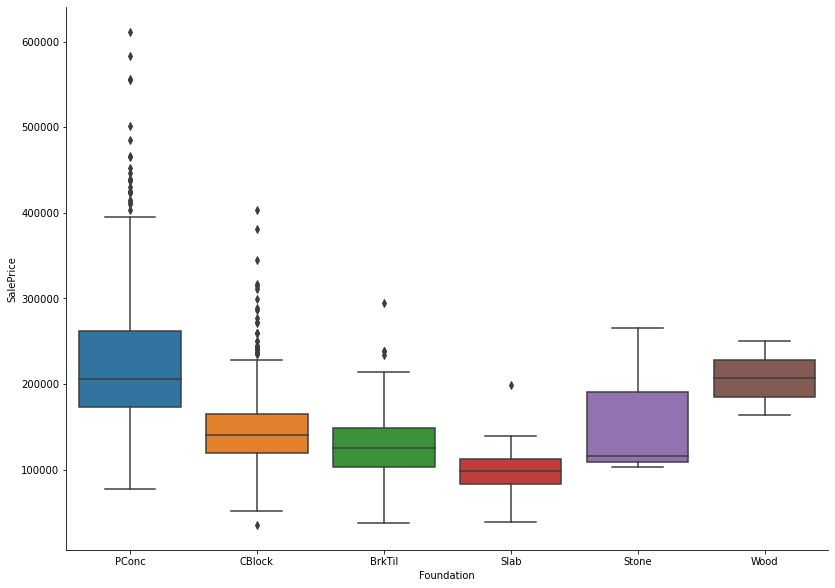

In [52]:
sns.catplot(x="Foundation"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [53]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="Foundation"
         , aggfunc='count' 
        )

,SalePrice
Foundation,
BrkTil,119
CBlock,529
PConc,602
Slab,11
Stone,3
Wood,2


#### BsmtQual - will be used

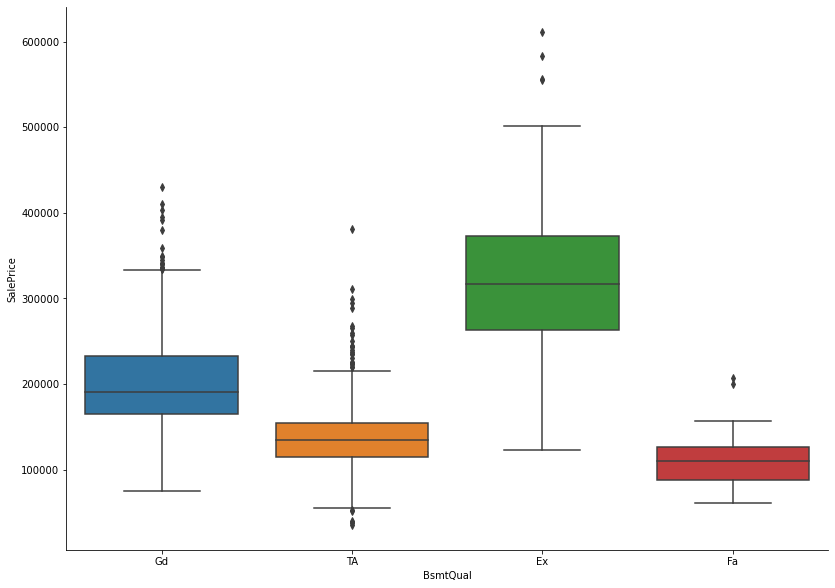

In [54]:
sns.catplot(x="BsmtQual"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [55]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="BsmtQual"
         , aggfunc='count' 
        )

,SalePrice
BsmtQual,
Ex,111
Fa,27
Gd,563
TA,565


#### BsmtCond - not in used

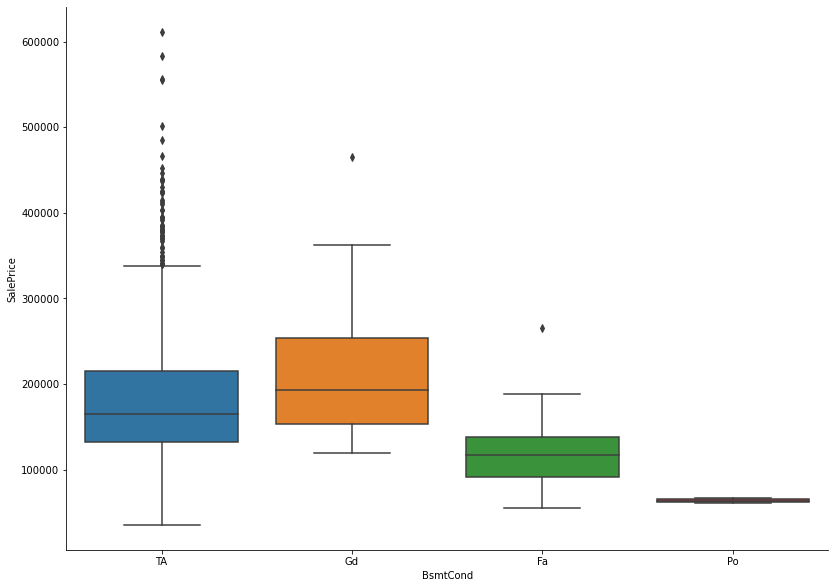

In [56]:
sns.catplot(x="BsmtCond"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [57]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="BsmtCond"
         , aggfunc='count' 
        )

,SalePrice
BsmtCond,
Fa,37
Gd,58
Po,2
TA,1169


#### BsmtExposure - not in used

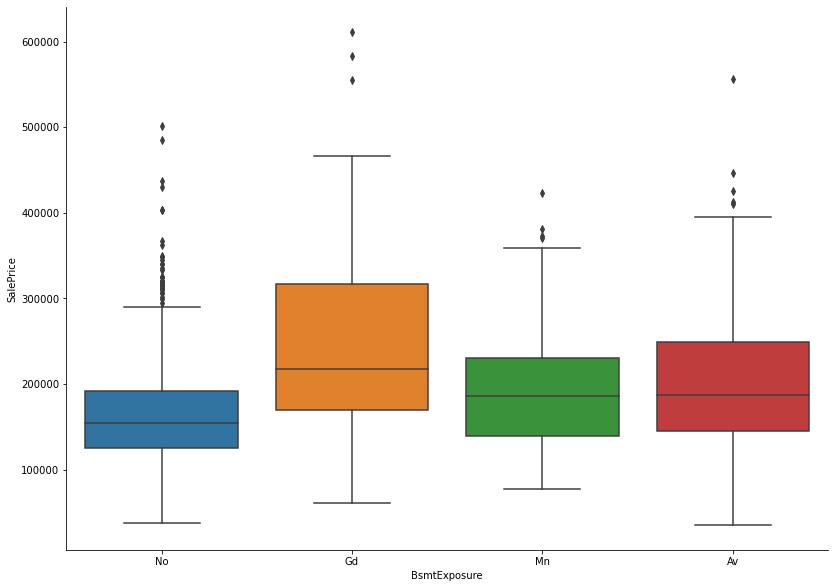

In [58]:
sns.catplot(x="BsmtExposure"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [59]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="BsmtExposure"
         , aggfunc='count' 
        )

,SalePrice
BsmtExposure,
Av,201
Gd,108
Mn,101
No,856


#### BsmtFinType1 - not in used

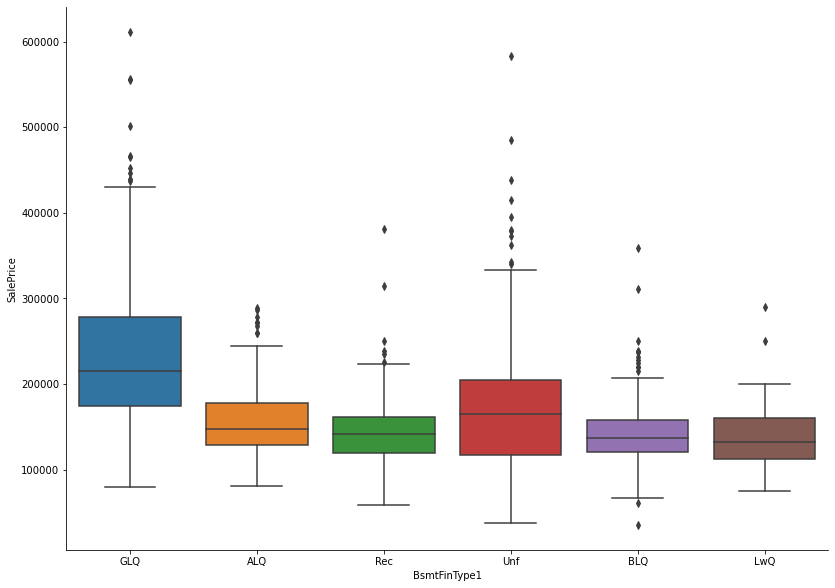

In [60]:
sns.catplot(x="BsmtFinType1"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [61]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="BsmtFinType1"
         , aggfunc='count' 
        )

,SalePrice
BsmtFinType1,
ALQ,190
BLQ,127
GLQ,378
LwQ,59
Rec,116
Unf,396


#### BsmtFinType2 - not in used

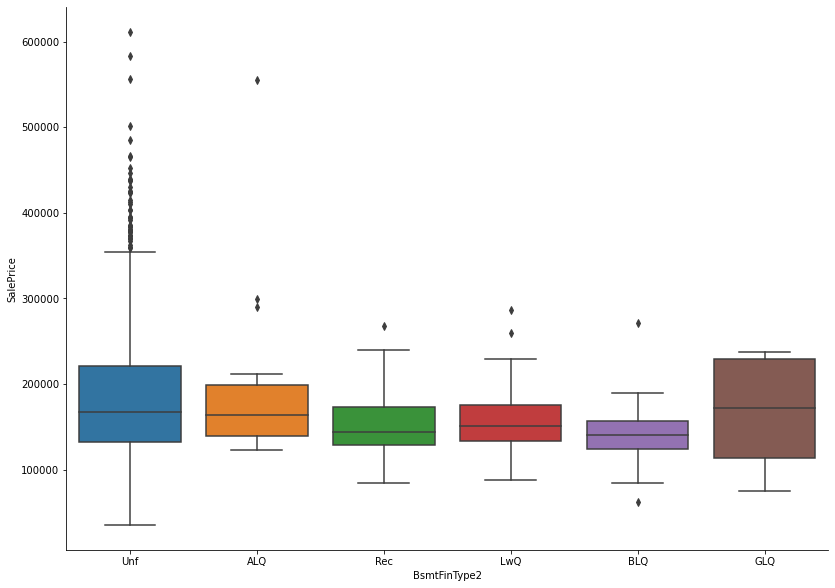

In [62]:
sns.catplot(x="BsmtFinType2"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [63]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="BsmtFinType1"
         , aggfunc='count' 
        )

,SalePrice
BsmtFinType1,
ALQ,190
BLQ,127
GLQ,378
LwQ,59
Rec,116
Unf,396


#### Heating - not in used

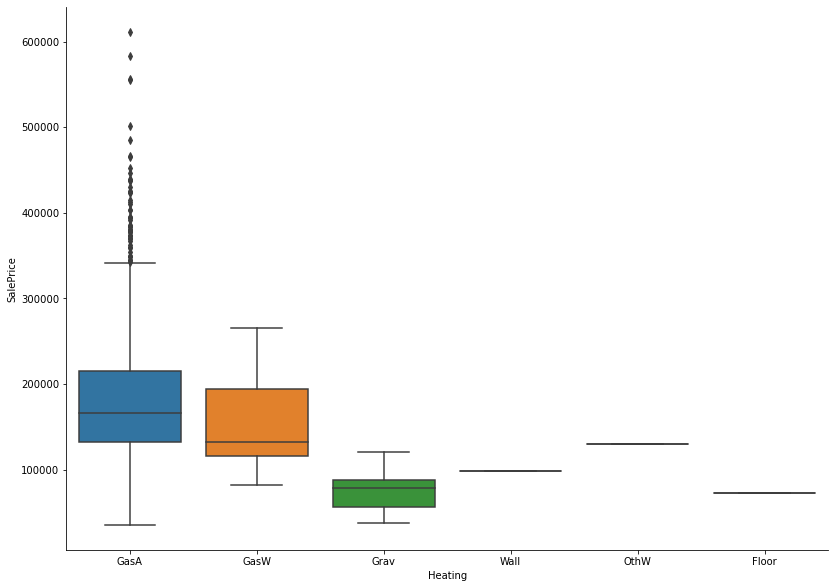

In [64]:
sns.catplot(x="Heating"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [65]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="Heating"
         , aggfunc='count' 
        )

,SalePrice
Heating,
Floor,1
GasA,1242
GasW,14
Grav,7
OthW,1
Wall,1


#### HeatingQC - will be used

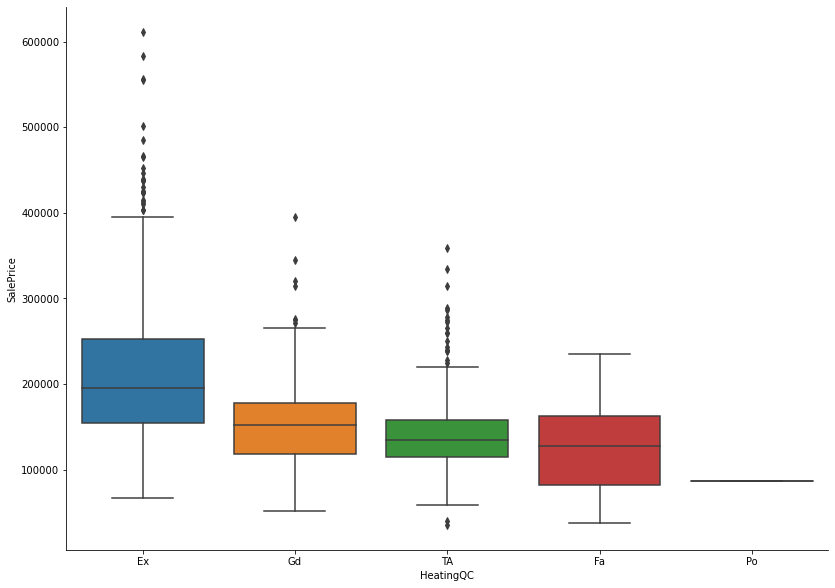

In [66]:
sns.catplot(x="HeatingQC"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [67]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="HeatingQC"
         , aggfunc='count' 
        )

,SalePrice
HeatingQC,
Ex,672
Fa,37
Gd,207
Po,1
TA,349


#### CentralAir - not in used

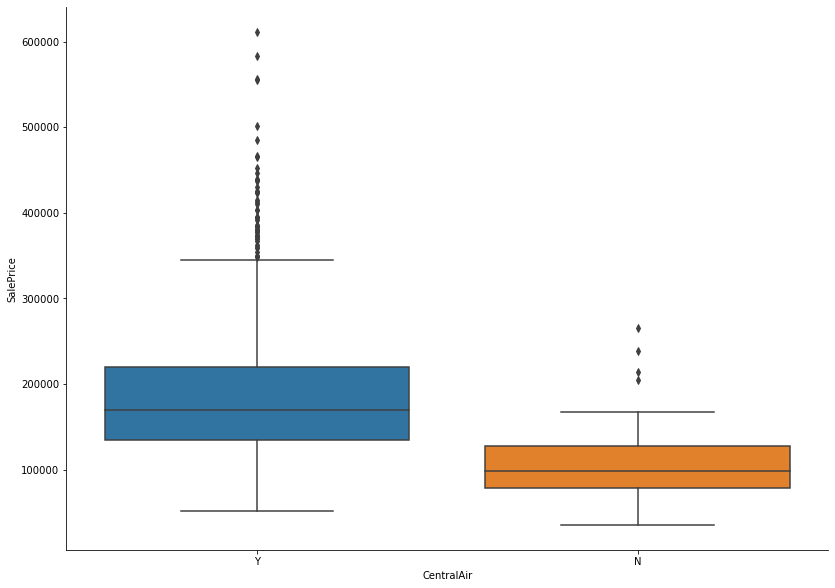

In [68]:
sns.catplot(x="CentralAir"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [69]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="CentralAir"
         , aggfunc='count' 
        )

,SalePrice
CentralAir,
N,64
Y,1202


Although this varible is very good, it's extremely biased with 94% property having central air conditioning.

#### Electrical - not in used

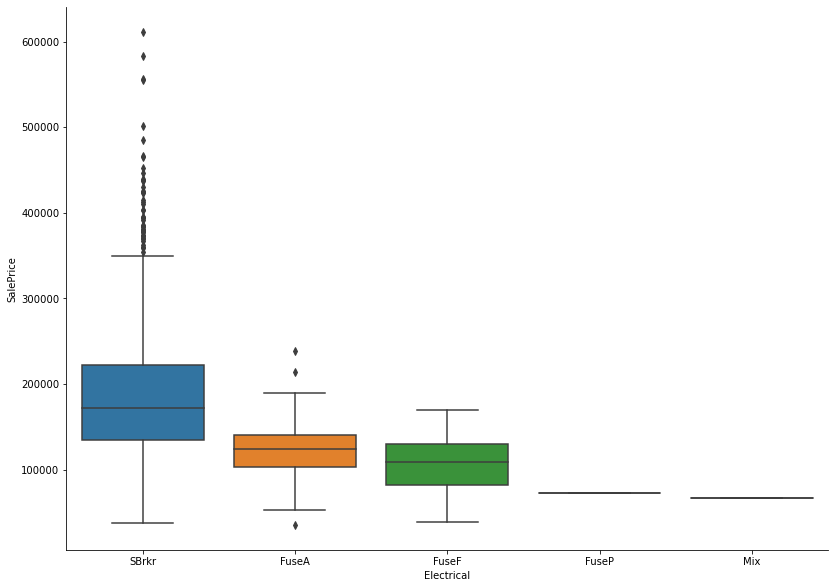

In [70]:
sns.catplot(x="Electrical"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [71]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="Electrical"
         , aggfunc='count' 
        )

,SalePrice
Electrical,
FuseA,76
FuseF,21
FuseP,1
Mix,1
SBrkr,1167


Similarity, this varible is not in used because it's an extrem varible. 

#### KitchenQual - will be used

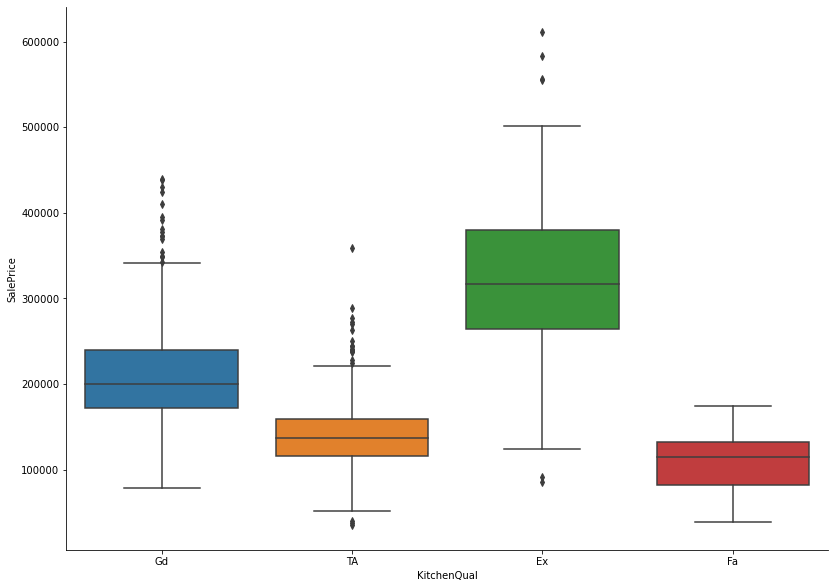

In [72]:
sns.catplot(x="KitchenQual"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [73]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="KitchenQual"
         , aggfunc='count' 
        )

,SalePrice
KitchenQual,
Ex,90
Fa,30
Gd,536
TA,610


#### Functional - not in used

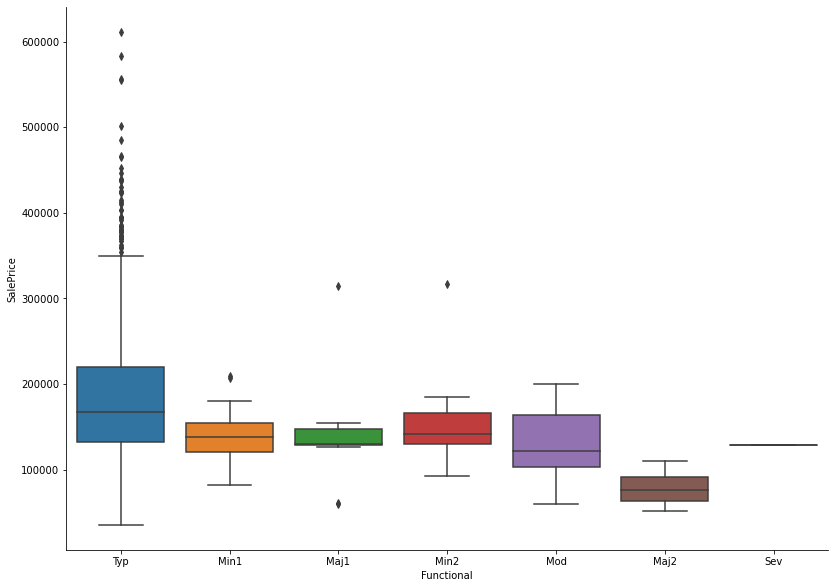

In [74]:
sns.catplot(x="Functional"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [75]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="Functional"
         , aggfunc='count' 
        )

,SalePrice
Functional,
Maj1,11
Maj2,4
Min1,23
Min2,28
Mod,7
Sev,1
Typ,1192


#### GarageType - will be used

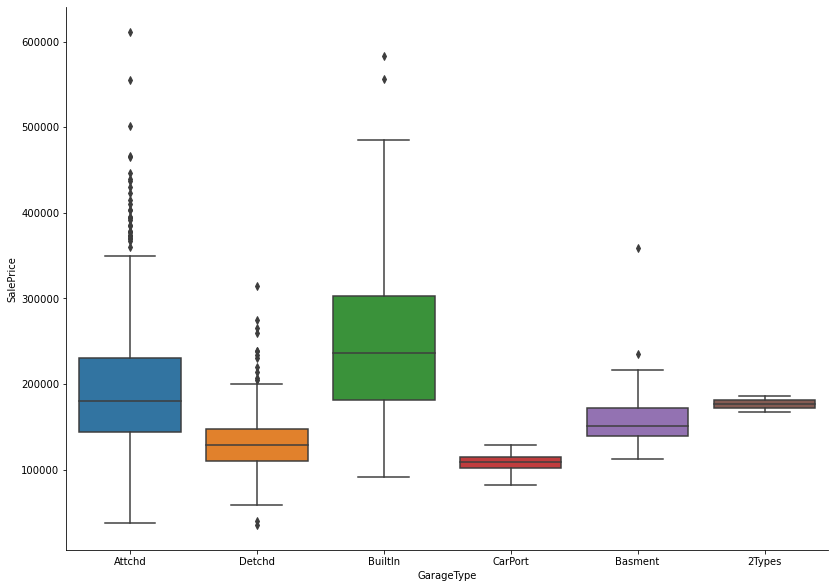

In [76]:
sns.catplot(x="GarageType"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [77]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="GarageType"
         , aggfunc='count' 
        )

,SalePrice
GarageType,
2Types,2
Attchd,839
Basment,16
BuiltIn,81
CarPort,4
Detchd,324


Let's have a closer look at attached, detached and built-in garages. Those sale prices vary significants, and they contributes 92% shares. It's worth to include in the model.

#### GarageFinish - will be used

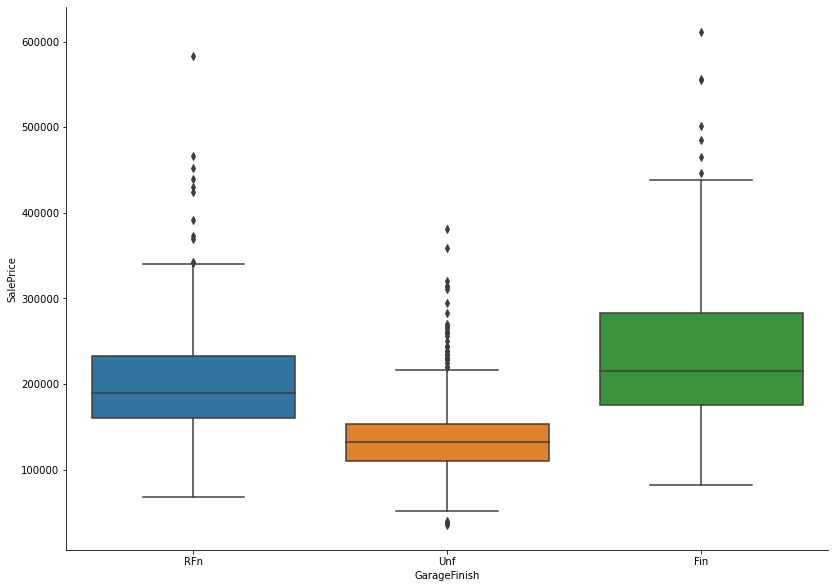

In [78]:
sns.catplot(x="GarageFinish"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [79]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="GarageFinish"
         , aggfunc='count' 
        )

,SalePrice
GarageFinish,
Fin,322
RFn,375
Unf,569


#### GarageQual - not in used

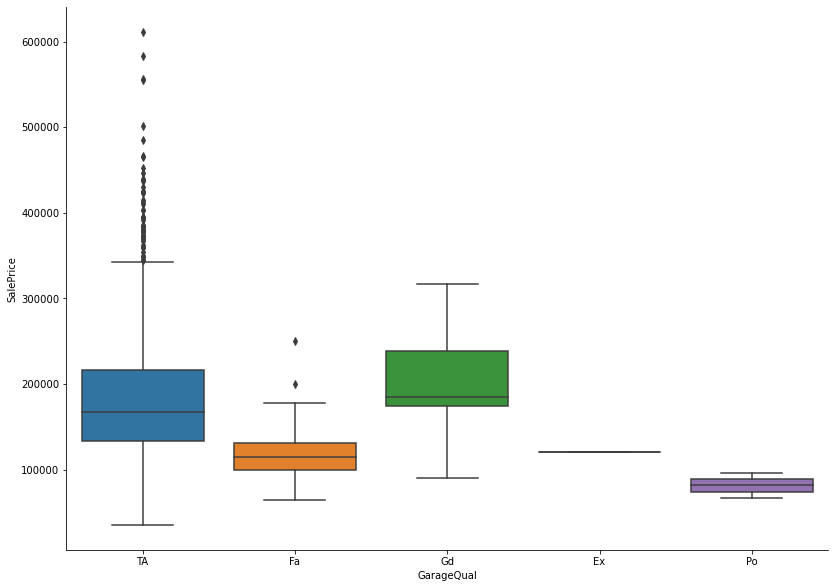

In [80]:
sns.catplot(x="GarageQual"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [81]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="GarageQual"
         , aggfunc='count' 
        )

,SalePrice
GarageQual,
Ex,1
Fa,37
Gd,9
Po,2
TA,1217


#### GarageCond - not in used

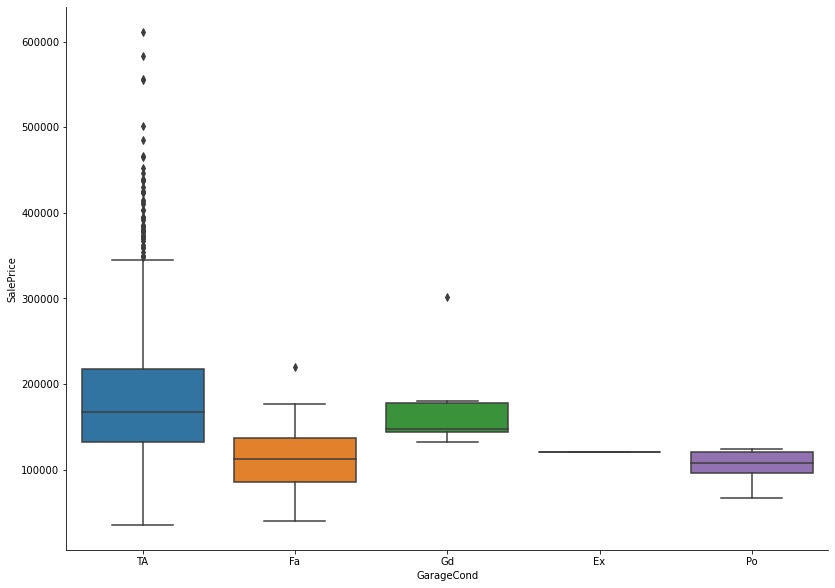

In [82]:
sns.catplot(x="GarageCond"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [83]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="GarageCond"
         , aggfunc='count' 
        )

,SalePrice
GarageCond,
Ex,1
Fa,28
Gd,7
Po,5
TA,1225


#### PavedDrive - not in used

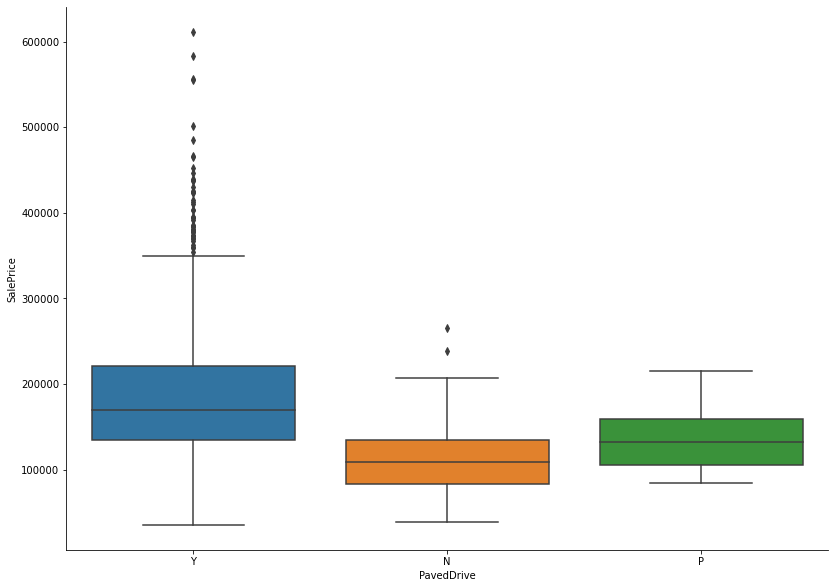

In [84]:
sns.catplot(x="PavedDrive"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [85]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="PavedDrive"
         , aggfunc='count' 
        )

,SalePrice
PavedDrive,
N,67
P,26
Y,1173


#### SaleType - not in used

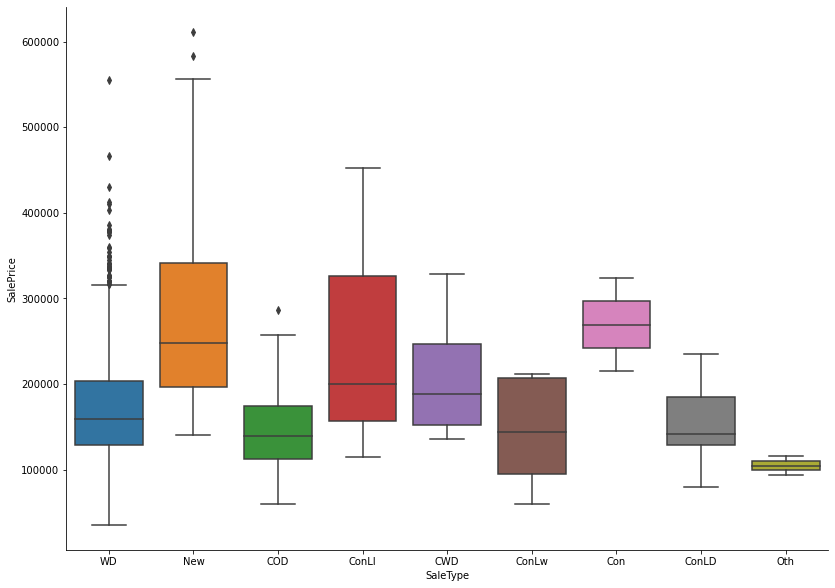

In [86]:
sns.catplot(x="SaleType"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [87]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="SaleType"
         , aggfunc='count' 
        )

,SalePrice
SaleType,
COD,37
CWD,4
Con,2
ConLD,6
ConLI,3
ConLw,5
New,115
Oth,2
WD,1092


#### SaleCondition - not in used

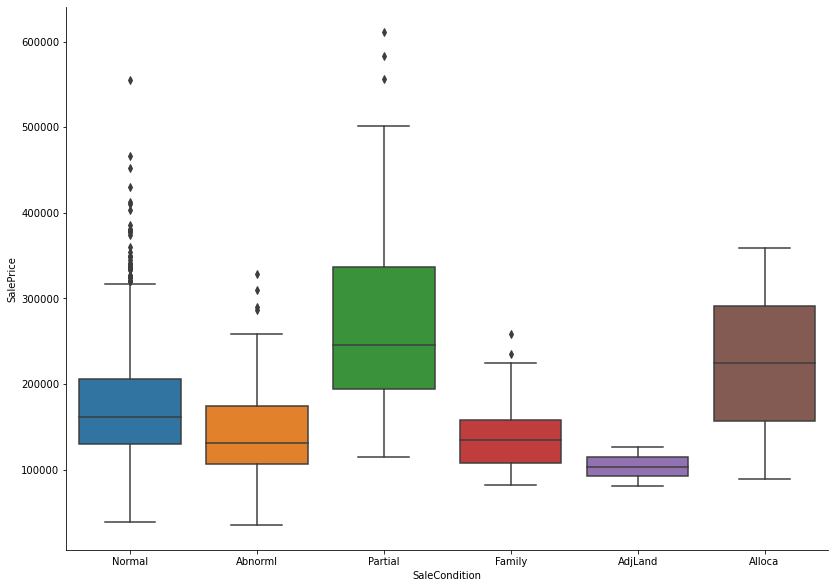

In [88]:
sns.catplot(x="SaleCondition"
            , y="SalePrice"
            , kind="box"
            , data = data
            , height=8.27
            , aspect=11.7/8.27
           )

In [89]:
pd.pivot_table(data=data
         , values="SalePrice"
         , index="SaleCondition"
         , aggfunc='count' 
        )

,SalePrice
SaleCondition,
Abnorml,84
AdjLand,2
Alloca,2
Family,17
Normal,1043
Partial,118


#### List of categorical variables are used in the linear model

* MSSubClass: Identifies the type of dwelling involved in the sale.
* MSZoning: Identifies the general zoning classification of the sale.
* Neighborhood: Physical locations within Ames city limits.
* HouseStyle: Style of dwelling
* Exterior1st: Exterior covering on house
* MasVnrType: Masonry veneer type
* ExterQual: Evaluates the quality of the material on the exterior.
* Foundation: Type of foundation.
* BsmtQual: Evaluates the height of the basement.
* HeatingQC: Heating quality and condition.
* KitchenQual: Kitchen quality
* GarageType: Garage location
* GarageFinish: Interior finish of the garage

#### Creating dummy variables

In [90]:
MSSubClass = pd.get_dummies(data['MSSubClass'], drop_first = True)
MSSubClass

,30,40,45,50,60,70,75,80,85,90,120,160,180,190
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1454,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1455,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1456,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
MSZoning = pd.get_dummies(data['MSZoning'], drop_first = True)
MSZoning

,FV,RH,RL,RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
1453,0,0,1,0
1454,1,0,0,0
1455,0,0,1,0
1456,0,0,1,0


In [92]:
Neighborhood = pd.get_dummies(data['Neighborhood'], drop_first = True)
Neighborhood

,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1454,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1455,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1456,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [93]:
HouseStyle = pd.get_dummies(data['HouseStyle'], drop_first = True)
HouseStyle

,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
1453,0,1,0,0,0,0,0
1454,0,1,0,0,0,0,0
1455,0,0,0,0,1,0,0
1456,0,1,0,0,0,0,0


In [94]:
Exterior1st = pd.get_dummies(data['Exterior1st'], drop_first = True)
Exterior1st

,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing
0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0,0,0,0,0,0,0,0,0,0,1,0,0
1454,0,0,0,0,0,0,0,0,0,0,1,0,0
1455,0,0,0,0,0,0,0,0,0,0,1,0,0
1456,0,0,0,0,0,0,0,1,0,0,0,0,0


In [95]:
MasVnrType = pd.get_dummies(data['MasVnrType'], drop_first = True)
MasVnrType

,BrkFace,None,Stone
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
1453,0,1,0
1454,0,1,0
1455,0,1,0
1456,0,0,1


In [96]:
ExterQual = pd.get_dummies(data['ExterQual'], drop_first = True)
ExterQual

,Fa,Gd,TA
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
1453,0,0,1
1454,0,1,0
1455,0,0,1
1456,0,0,1


In [97]:
Foundation = pd.get_dummies(data['Foundation'], drop_first = True)
Foundation

,CBlock,PConc,Slab,Stone,Wood
0,0,1,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
1453,0,1,0,0,0
1454,0,1,0,0,0
1455,0,1,0,0,0
1456,1,0,0,0,0


In [98]:
BsmtQual = pd.get_dummies(data['BsmtQual'], drop_first = True)
BsmtQual

,Fa,Gd,TA
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
1453,0,1,0
1454,0,1,0
1455,0,1,0
1456,0,1,0


In [99]:
HeatingQC = pd.get_dummies(data['HeatingQC'], drop_first = True)
HeatingQC

,Fa,Gd,Po,TA
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
1453,0,0,0,0
1454,0,0,0,0
1455,0,0,0,0
1456,0,0,0,1


In [100]:
KitchenQual = pd.get_dummies(data['KitchenQual'], drop_first = True)
KitchenQual

,Fa,Gd,TA
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1453,0,0,1
1454,0,1,0
1455,0,0,1
1456,0,0,1


In [101]:
GarageType = pd.get_dummies(data['GarageType'], drop_first = True)
GarageType

,Attchd,Basment,BuiltIn,CarPort,Detchd
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,1,0,0,0,0
...,...,...,...,...,...
1453,1,0,0,0,0
1454,1,0,0,0,0
1455,1,0,0,0,0
1456,1,0,0,0,0


In [102]:
GarageFinish = pd.get_dummies(data['GarageFinish'], drop_first = True)
GarageFinish

,RFn,Unf
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
1453,0,1
1454,1,0
1455,1,0
1456,0,1


### Continuous varibles

For continuous variables, the best way is plotting correlation between each independent variables and dependent variables. Then, most correlated varibles are selected.

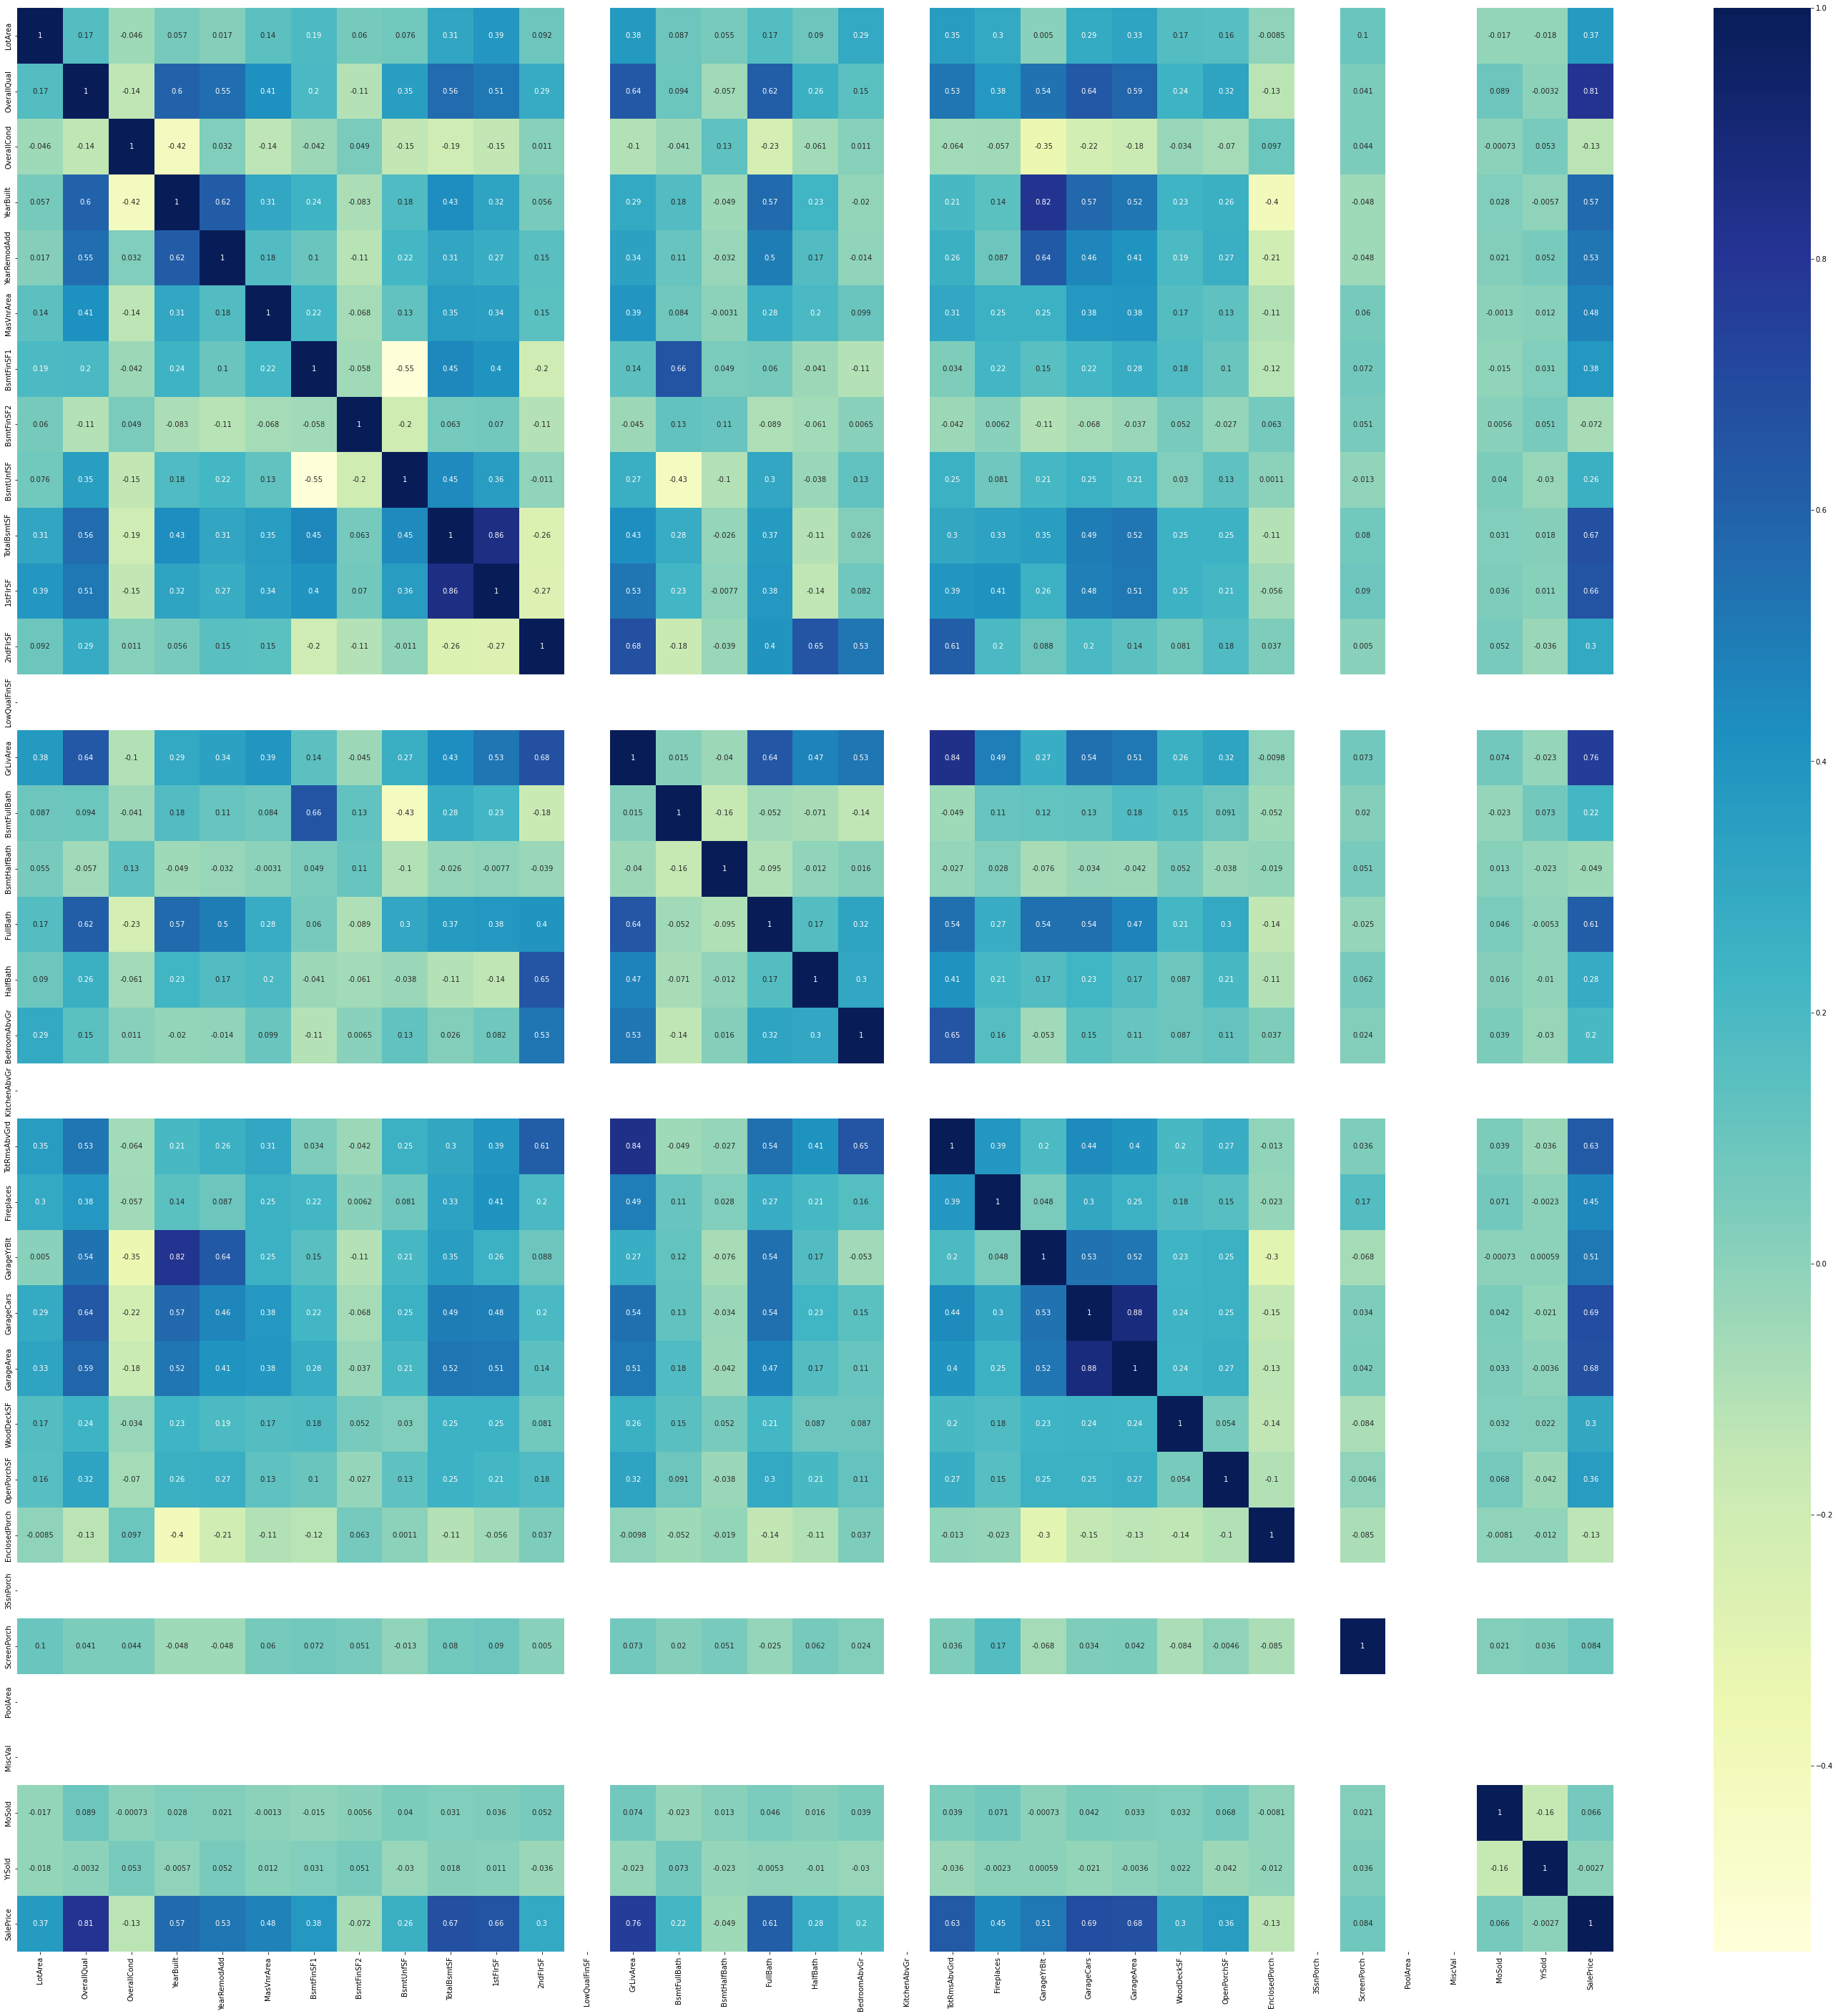

In [103]:
corr_vars = data[['LotArea'
                ,'OverallQual'
                ,'OverallCond'
                ,'YearBuilt'
                ,'YearRemodAdd'
                ,'MasVnrArea'
                ,'BsmtFinSF1'
                ,'BsmtFinSF2'
                ,'BsmtUnfSF'
                ,'TotalBsmtSF'
                ,'1stFlrSF'
                ,'2ndFlrSF'
                ,'LowQualFinSF'
                ,'GrLivArea'
                ,'BsmtFullBath' 
                ,'BsmtHalfBath'
                ,'FullBath'
                ,'HalfBath'
                ,'BedroomAbvGr'
                ,'KitchenAbvGr'
                ,'TotRmsAbvGrd'
                ,'Fireplaces'
                ,'GarageYrBlt'
                ,'GarageCars'
                ,'GarageArea'  
                ,'WoodDeckSF'
                ,'OpenPorchSF'
                ,'EnclosedPorch'
                ,'3SsnPorch'
                ,'ScreenPorch'
                ,'PoolArea'
                ,'MiscVal'
                ,'MoSold'
                ,'YrSold'  
                ,'SalePrice'
                 ]]

plt.figure(figsize = (50, 50))
sns.heatmap(corr_vars.corr(), annot = True, cmap="YlGnBu")
plt.show()

According to the correlation heatmap, following variables are selected
* YearBuilt
* MasVnrArea
* TotalBsmtSF
* Fireplaces

Although there are many high correlated variables, they also corrlate each other. For example, OverallQual highly correlates with SalePrice, it also correlates with other variables. Adding those variable may cause multicollinearity. 

### Consolidating final variables

In [104]:
final_data = pd.concat([data[['SalePrice', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF', 'Fireplaces']]
                        , HouseStyle
                        , Exterior1st
                        , MasVnrType
                        , ExterQual
                        , Foundation
                        , BsmtQual
                        , HeatingQC
                        , KitchenQual
                        , GarageType
                        , GarageFinish
                       ]
                       , axis = 1
                      )
final_data.head()

,SalePrice,YearBuilt,MasVnrArea,TotalBsmtSF,Fireplaces,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,BrkFace,None,Stone,Fa,Gd,TA,CBlock,PConc,Slab,Stone,Wood,Fa,Gd,TA,Fa,Gd,Po,TA,Fa,Gd,TA,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,Unf
0,208500,2003,196.0,856,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,181500,1976,0.0,1262,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
2,223500,2001,162.0,920,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,140000,1915,0.0,756,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1
4,250000,2000,350.0,1145,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [105]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1266 entries, 0 to 1459
Data columns (total 53 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SalePrice    1266 non-null   int64  
 1   YearBuilt    1266 non-null   int64  
 2   MasVnrArea   1266 non-null   float64
 3   TotalBsmtSF  1266 non-null   int64  
 4   Fireplaces   1266 non-null   int64  
 5   1.5Unf       1266 non-null   uint8  
 6   1Story       1266 non-null   uint8  
 7   2.5Fin       1266 non-null   uint8  
 8   2.5Unf       1266 non-null   uint8  
 9   2Story       1266 non-null   uint8  
 10  SFoyer       1266 non-null   uint8  
 11  SLvl         1266 non-null   uint8  
 12  BrkComm      1266 non-null   uint8  
 13  BrkFace      1266 non-null   uint8  
 14  CBlock       1266 non-null   uint8  
 15  CemntBd      1266 non-null   uint8  
 16  HdBoard      1266 non-null   uint8  
 17  ImStucc      1266 non-null   uint8  
 18  MetalSd      1266 non-null   uint8  
 19  Plywoo

## Training model
### Splitting the data into train and test sets

In [106]:
y = final_data.pop('SalePrice')
X = final_data

In [107]:
np.random.seed(1508) ## it's my favorite to use current date as seed :D
# df_train, df_test = train_test_split(final_data, train_size = 0.7, test_size = 0.3, random_state = 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=100)

In [108]:
X_train.shape

(848, 52)

In [109]:
X_test.shape

(418, 52)

It seems the split work well

### Rescaling variables for both train and test data

Normally, I would prefer to use standardization to scale variables. I have never use normalisation, so I think it's time to experience the new method. Normalisation method is used to rescall all variables except dummy variabies

In [110]:
# columns to be scaled, list of numeric columns can be found above
X_train.select_dtypes(include=['int64', 'uint8', 'float64']).columns

Index(['YearBuilt', 'MasVnrArea', 'TotalBsmtSF', 'Fireplaces', '1.5Unf',
       '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl', 'BrkComm',
       'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd',
       'Plywood', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing',
       'BrkFace', 'None', 'Stone', 'Fa', 'Gd', 'TA', 'CBlock', 'PConc', 'Slab',
       'Stone', 'Wood', 'Fa', 'Gd', 'TA', 'Fa', 'Gd', 'Po', 'TA', 'Fa', 'Gd',
       'TA', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'RFn',
       'Unf'],
      dtype='object')

In [111]:
scaler = MinMaxScaler()

num_vars = ['YearBuilt', 'MasVnrArea', 'TotalBsmtSF', 'Fireplaces', '1.5Unf',
       '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl', 'BrkComm',
       'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd',
       'Plywood', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing',
       'BrkFace', 'None', 'Stone', 'Fa', 'Gd', 'TA', 'CBlock', 'PConc', 'Slab',
       'Stone', 'Wood', 'Fa', 'Gd', 'TA', 'Fa', 'Gd', 'Po', 'TA', 'Fa', 'Gd',
       'TA', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'RFn',
       'Unf']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

,YearBuilt,MasVnrArea,TotalBsmtSF,Fireplaces,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,BrkFace,None,Stone,Fa,Gd,TA,CBlock,PConc,Slab,Stone,Wood,Fa,Gd,TA,Fa,Gd,Po,TA,Fa,Gd,TA,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,Unf
1067,0.646154,0.318866,0.243294,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
301,0.907692,0.000000,0.320649,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
261,0.976923,0.239150,0.462258,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
417,0.292308,0.000000,0.427324,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1055,0.738462,0.141718,0.372115,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

X_test.head()

,YearBuilt,MasVnrArea,TotalBsmtSF,Fireplaces,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,BrkFace,None,Stone,Fa,Gd,TA,CBlock,PConc,Slab,Stone,Wood,Fa,Gd,TA,Fa,Gd,Po,TA,Fa,Gd,TA,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,Unf
846,0.880597,0.178385,0.239173,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
463,0.440299,0.000000,0.231092,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
126,0.753731,0.000000,0.348416,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
718,0.880597,0.847656,0.423723,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
123,0.880597,0.000000,0.387524,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Perfect, it works. The min and max of all variables are 0 and 1 respectively. Then, we need to seperate independent variables and dependent variables.

### Rigde

In [113]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [114]:
print(model_cv.best_params_)

{'alpha': 0.4}


In [115]:
alpha = 0.4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 15833.42884996  62497.83294742 255891.67243039  41941.6328564
 -15074.91731645 -23372.59556118      0.          18304.10248956
  17298.47477029 -17121.7504641   -5011.58886707 -54940.60391041
  26987.33587976 -23652.64186836  -5452.77532735   1351.739648
  25781.35204879   1160.91483169   2836.95119048  49906.07632746
  26350.17247294   3215.96580674   4640.17130701   3460.54635378
  13276.59370458  21394.86270508  21735.96664837 -36779.74060976
 -29405.10883132 -39974.01935158   3422.46312705   7055.44821791
  52702.11808003  19534.71200625  37084.92345459 -46816.60010885
 -37895.08815143 -41483.26690412 -13320.28394323  -1989.35694315
      0.          -5166.49030134 -47529.36808236 -31399.64009076
 -48528.87084425   2178.05014566   6267.27456418  25625.92092162
 -22982.40001305  -2251.71930577  -6926.35533079  -9688.49633247]


In [116]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8446454242049835
0.7761052283539507
775971011996.4434
508655152845.4678
915060155.6561832
1216878356.0896358


### Lasso

Although there is large number of variables, I don't think all variables are essential for model. Hence Lasso method is used to reduce some unncessary variables.

In [117]:
# cross validation
folds = 10

lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [118]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 50}
-23464.225297066336


The optimum value of alpha is 50

In [119]:
alpha =50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=50)

In [120]:
lasso.coef_

array([ 14957.79789256,  60559.48778308, 269683.67355059,  41651.94063882,
       -10812.75645558, -22012.17557696,      0.        ,  11111.76521649,
        19674.13371498, -12320.63478606,  -1283.80185291, -38238.96012074,
        22099.81035734,     -0.        ,  -6302.75019173,  -1070.61798961,
            0.        ,   -717.81218779,     -0.        ,  22903.49698256,
        20331.84000292,    839.07401702,    799.31917237,      0.        ,
         4878.85490584,  13217.99678178,  12944.34379128, -32726.38624188,
       -25996.79080429, -37063.65965819,      0.        ,   3747.92165201,
        51844.86161344,   5806.28010068,  22996.97474248, -45409.55439909,
       -37388.17512376, -40185.85275211, -12278.24728452,   -956.80452149,
            0.        ,  -4569.63333438, -45041.91771604, -29959.86562233,
       -47366.04286288,      0.        ,   1509.78263042,  23968.15464441,
           -0.        ,  -4207.80591251,  -6623.1747858 ,  -9521.4493904 ])

In [121]:
lasso.intercept_

171830.06546299055

In [122]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8425735937465644
0.779751549846927
786319470477.8062
500371260360.1816
927263526.5068469
1197060431.4836879


In [123]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric2
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'] )

# rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.446454e-01,8.425736e-01
1,R2 Score (Test),7.761052e-01,7.797515e-01
2,RSS (Train),7.759710e+11,7.863195e+11
3,RSS (Test),5.086552e+11,5.003713e+11
4,MSE (Train),3.024996e+04,3.045100e+04
5,MSE (Test),3.488378e+04,3.459856e+04


In [124]:
betas = pd.DataFrame(index=X.columns)

betas.rows = X.columns

# betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [125]:
# print("Number of Normal Linear regression variables:", len(betas['Linear'][betas['Linear'] != 0]))
print("Number of Ridge regression variables:", len(betas['Ridge'][betas['Ridge'] != 0]))
print("Number of Lasso regression variables:", len(betas['Lasso'][betas['Lasso'] != 0]))

Number of Ridge regression variables: 50
Number of Lasso regression variables: 43


## Model evaluation

Lasso regression is chosen because the R-squared is similar while Lasso requires less variables.

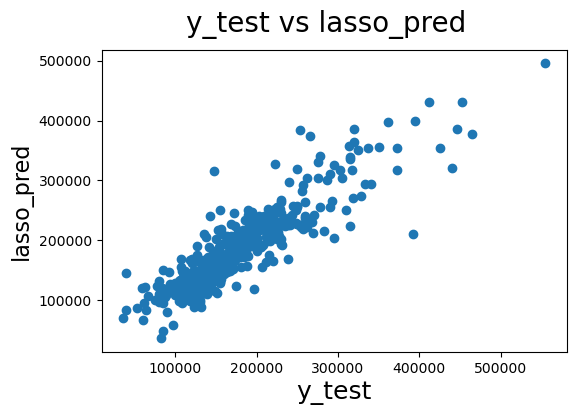

In [126]:
lasso_pred = lasso.predict(X_test)

# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

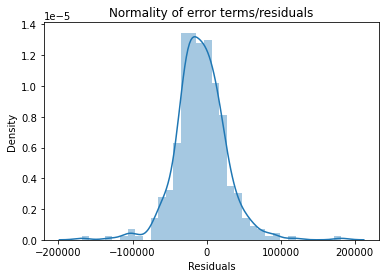

In [127]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

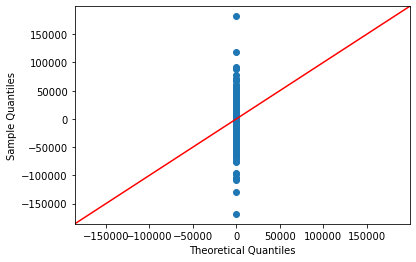

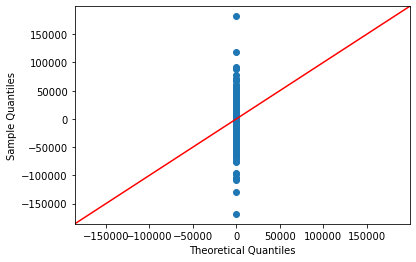

In [128]:
sm.qqplot(y_res, line ='45')

In [129]:
betas = pd.DataFrame(index=X_train.columns)
betas['Lasso'] = lasso.coef_

The final model is:

In [130]:
lasso.intercept_

171830.06546299055

In [131]:
betas[betas['Lasso'] != 0]

,Lasso
YearBuilt,14957.797893
MasVnrArea,60559.487783
TotalBsmtSF,269683.673551
Fireplaces,41651.940639
1.5Unf,-10812.756456
1Story,-22012.175577
2.5Unf,11111.765216
2Story,19674.133715
SFoyer,-12320.634786
SLvl,-1283.801853
